In [1]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import random
from tensorflow.keras.preprocessing import image
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import roc_curve

In [2]:
# Set up the path to your dataset
dataset_dir = '/kaggle/input/alzheimers-disease-classification/Alzheimer\'s Disease/'

# Function to load images and labels from subfolders
def load_images_and_labels(dataset_dir):
    images = []
    labels = []
    
    # Iterate through subfolders (NonDemented and Demented)
    for label, subfolder in enumerate(os.listdir(dataset_dir)):
        subfolder_path = os.path.join(dataset_dir, subfolder)
        if os.path.isdir(subfolder_path):
            # Read each image in the subfolder
            for img_name in os.listdir(subfolder_path):
                if img_name.endswith('.jpg') or img_name.endswith('.png'):
                    img_path = os.path.join(subfolder_path, img_name)
                    
                    # Load and preprocess the image
                    img = image.load_img(img_path, target_size=(150, 150))
                    img_array = image.img_to_array(img) / 255.0  # Rescale image
                    
                    images.append(img_array)
                    labels.append(label)  # 0 for NonDemented, 1 for Demented
    
    return np.array(images), np.array(labels)

# Load all images and labels
images, labels = load_images_and_labels(dataset_dir)

# Split the data into 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42, stratify=labels)

# Further split the training set into 80% training and 25% validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42, stratify=y_train)

# Print the number of images in each split
print(f"Number of images in Training set: {len(X_train)}")
print(f"Number of images in Validation set: {len(X_val)}")
print(f"Number of images in Test set: {len(X_test)}")


Number of images in Training set: 3840
Number of images in Validation set: 1280
Number of images in Test set: 1280


Displaying sample images from the training set:


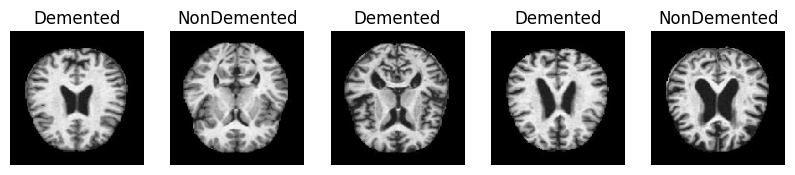

Displaying sample images from the validation set:


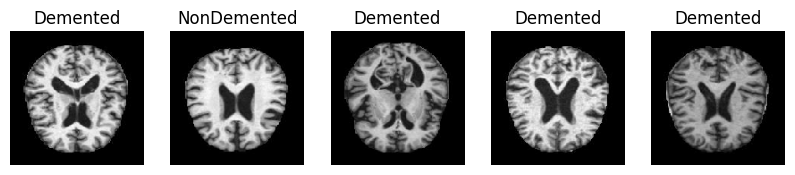

Displaying sample images from the test set:


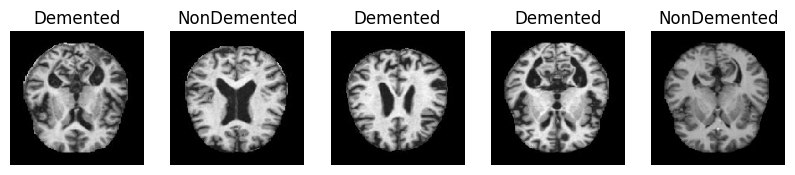

In [3]:
# Function to display a few sample images with labels
def display_sample_images(X_data, y_data, num_samples=5):
    # Choose random indices to display
    random_indices = random.sample(range(len(X_data)), num_samples)
    
    plt.figure(figsize=(10, 10))
    
    for i, idx in enumerate(random_indices):
        # Get the image and label
        img = X_data[idx]
        label = 'Demented' if y_data[idx] == 1 else 'NonDemented'
        
        # Plot the image
        plt.subplot(1, num_samples, i+1)
        plt.imshow(img)
        plt.title(label)
        plt.axis('off')
    
    plt.show()

# Display sample images from the training set
print("Displaying sample images from the training set:")
display_sample_images(X_train, y_train, num_samples=5)


# Display sample images from the validation set
print("Displaying sample images from the validation set:")
display_sample_images(X_val, y_val, num_samples=5)

# Display sample images from the test set
print("Displaying sample images from the test set:")
display_sample_images(X_test, y_test, num_samples=5)

Displaying sample NonDemented images from the training set:


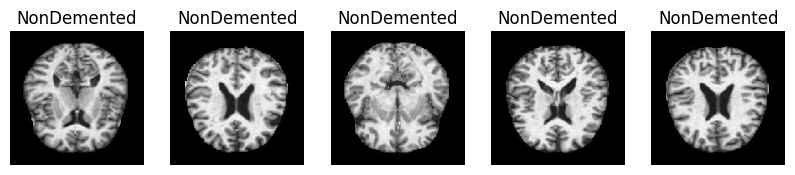

Displaying sample Demented images from the training set:


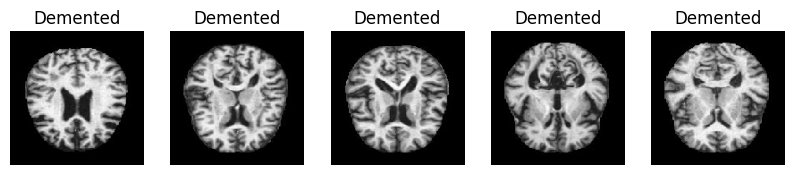

In [4]:
# Function to display a few sample images with labels
def display_sample_images(X_data, y_data, num_samples=5, label_to_display=None):
    if label_to_display is not None:
        # Get indices of images with the specified label (0 for NonDemented or 1 for Demented)
        indices = [i for i, label in enumerate(y_data) if label == label_to_display]
    else:
        # If no specific label is specified, select random indices from all
        indices = range(len(X_data))
    
    # Choose random indices to display
    random_indices = random.sample(indices, num_samples)
    
    plt.figure(figsize=(10, 10))
    
    for i, idx in enumerate(random_indices):
        # Get the image and label
        img = X_data[idx]
        label = 'Demented' if y_data[idx] == 1 else 'NonDemented'
        
        # Plot the image
        plt.subplot(1, num_samples, i+1)
        plt.imshow(img)
        plt.title(label)
        plt.axis('off')
    
    plt.show()

# Display sample NonDemented images from the training set
print("Displaying sample NonDemented images from the training set:")
display_sample_images(X_train, y_train, num_samples=5, label_to_display=0)

# Display sample Demented images from the training set
print("Displaying sample Demented images from the training set:")
display_sample_images(X_train, y_train, num_samples=5, label_to_display=1)


Displaying sample images from the training set:


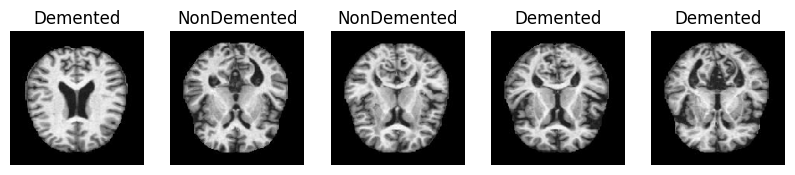

In [5]:
print("Displaying sample images from the training set:")
display_sample_images(X_train, y_train, num_samples=5)

In [6]:

# Define the CNN model
def create_cnn_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
    model.add(MaxPooling2D(2, 2))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(2, 2))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(2, 2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))  # Binary output
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create the model
model = create_cnn_model()

# Train the model with the training and validation sets
history = model.fit(X_train, y_train, epochs=32, batch_size=32, validation_data=(X_val, y_val))



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/32
120/120 ━━━━━━━━━━━━━━━━━━━━ 133s 1s/step - accuracy: 0.4969 - loss: 0.7792 - val_accuracy: 0.6500 - val_loss: 0.6821
Epoch 2/32
120/120 ━━━━━━━━━━━━━━━━━━━━ 106s 885ms/step - accuracy: 0.6023 - loss: 0.6694 - val_accuracy: 0.5953 - val_loss: 0.6485
Epoch 3/32
120/120 ━━━━━━━━━━━━━━━━━━━━ 103s 855ms/step - accuracy: 0.6618 - loss: 0.6258 - val_accuracy: 0.7070 - val_loss: 0.5675
Epoch 4/32
120/120 ━━━━━━━━━━━━━━━━━━━━ 143s 865ms/step - accuracy: 0.7185 - loss: 0.5553 - val_accuracy: 0.7500 - val_loss: 0.5077
Epoch 5/32
120/120 ━━━━━━━━━━━━━━━━━━━━ 104s 870ms/step - accuracy: 0.7738 - loss: 0.4904 - val_accuracy: 0.7602 - val_loss: 0.4936
Epoch 6/32
120/120 ━━━━━━━━━━━━━━━━━━━━ 163s 1s/step - accuracy: 0.7780 - loss: 0.4455 - val_accuracy: 0.7867 - val_loss: 0.4188
Epoch 7/32
120/120 ━━━━━━━━━━━━━━━━━━━━ 105s 875ms/step - accuracy: 0.8129 - loss: 0.3861 - val_accuracy: 0.8109 - val_loss: 0.3869
Epoch 8/32
120/120 ━━━━━━━━━━━━━━━━━━━━ 103s 858ms/step - accuracy: 0.8412 - loss:

In [7]:
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img) / 255.0  # Rescale image
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array

# Load and preprocess the two images for inference
img1_path = '/kaggle/input/alzheimers-disease-classification/Alzheimer\'s Disease/Demented/26 (19)mildDem.jpg'
img2_path = '/kaggle/input/alzheimers-disease-classification/Alzheimer\'s Disease/NonDem/26 (100).jpg'

img1 = preprocess_image(img1_path)
img2 = preprocess_image(img2_path)

# Make predictions
pred1 = model.predict(img1)
pred2 = model.predict(img2)

# Print the results
print(f"Prediction for {img1_path}: {'Demented' if pred1 > 0.5 else 'NonDemented'} (Probability: {pred1[0][0]:.2f})")
print(f"Prediction for {img2_path}: {'Demented' if pred2 > 0.5 else 'NonDemented'} (Probability: {pred2[0][0]:.2f})")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Prediction for /kaggle/input/alzheimers-disease-classification/Alzheimer's Disease/Demented/26 (19)mildDem.jpg: Demented (Probability: 1.00)
Prediction for /kaggle/input/alzheimers-disease-classification/Alzheimer's Disease/NonDem/26 (100).jpg: NonDemented (Probability: 0.00)


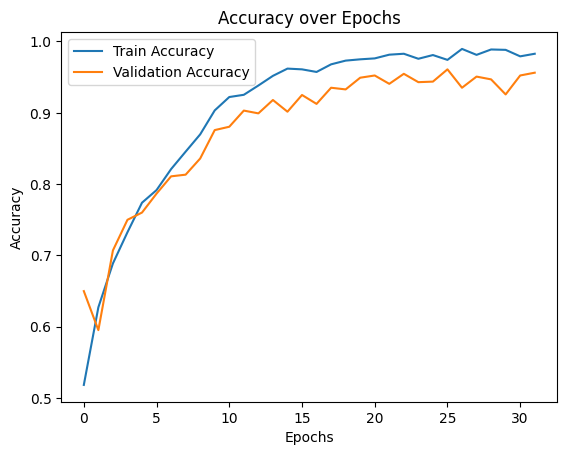

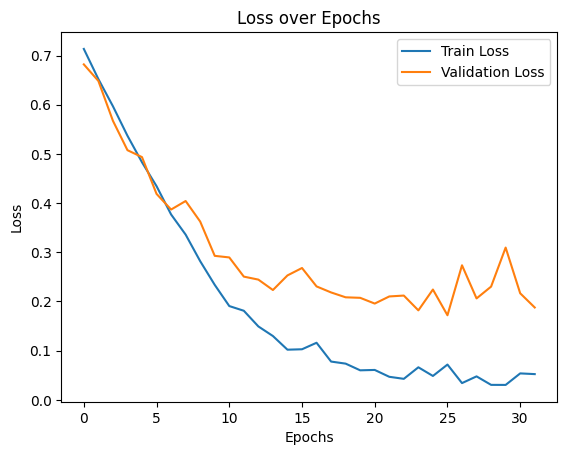

40/40 ━━━━━━━━━━━━━━━━━━━━ 9s 232ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       640
           1       0.95      0.93      0.94       640

    accuracy                           0.94      1280
   macro avg       0.94      0.94      0.94      1280
weighted avg       0.94      0.94      0.94      1280

Confusion Matrix:
[[608  32]
 [ 42 598]]


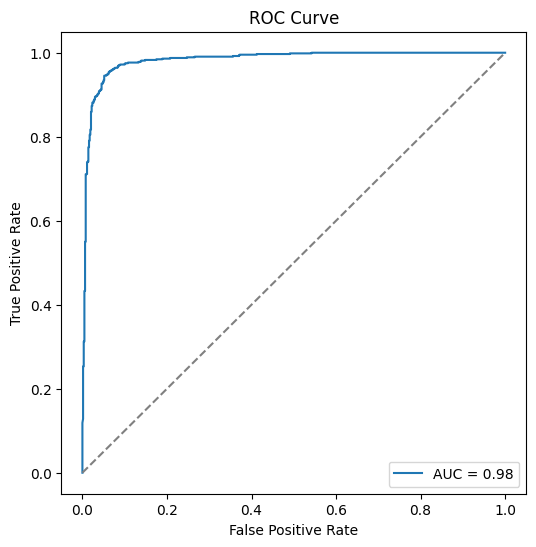

In [8]:
# Plot Accuracy Graph
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot Loss Graph
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_classes))

# Confusion Matrix
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred_classes)
print(conf_matrix)

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Prediction for /kaggle/input/alzheimers-disease-classification/Alzheimer's Disease/Demented/26 (19)mildDem.jpg: Demented (Probability: 1.00)
Prediction for /kaggle/input/alzheimers-disease-classification/Alzheimer's Disease/NonDem/26 (100).jpg: NonDemented (Probability: 0.00)


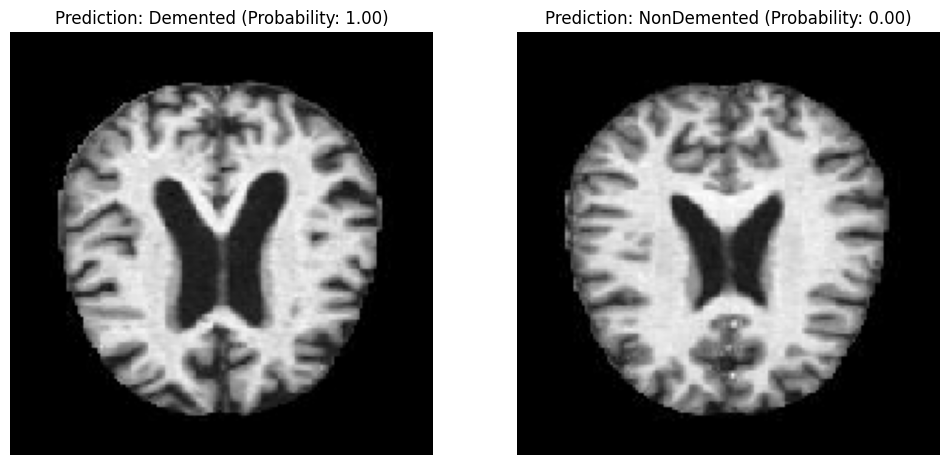

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image

# Function to preprocess image
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img) / 255.0  # Rescale image
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array, img

# Load and preprocess the two images for inference
img1_path = '/kaggle/input/alzheimers-disease-classification/Alzheimer\'s Disease/Demented/26 (19)mildDem.jpg'
img2_path = '/kaggle/input/alzheimers-disease-classification/Alzheimer\'s Disease/NonDem/26 (100).jpg'

img1, orig_img1 = preprocess_image(img1_path)
img2, orig_img2 = preprocess_image(img2_path)

# Make predictions
pred1 = model.predict(img1)
pred2 = model.predict(img2)

# Print the results
print(f"Prediction for {img1_path}: {'Demented' if pred1 > 0.5 else 'NonDemented'} (Probability: {pred1[0][0]:.2f})")
print(f"Prediction for {img2_path}: {'Demented' if pred2 > 0.5 else 'NonDemented'} (Probability: {pred2[0][0]:.2f})")

# Function to plot image and prediction result
def plot_image_with_prediction(image, prediction, label):
    plt.imshow(image)
    plt.title(f"Prediction: {label} (Probability: {prediction[0][0]:.2f})")
    plt.axis('off')

# Display Input and Preprocessed images with predictions

plt.figure(figsize=(12, 6))

# Display image 1 (original and preprocessed)
plt.subplot(1, 2, 1)
plot_image_with_prediction(orig_img1, pred1, 'Demented' if pred1 > 0.5 else 'NonDemented')

# Display image 2 (original and preprocessed)
plt.subplot(1, 2, 2)
plot_image_with_prediction(orig_img2, pred2, 'Demented' if pred2 > 0.5 else 'NonDemented')

plt.show()